<a href="https://colab.research.google.com/github/abkr97a/Spotify/blob/main/Wuzzuf_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import csv
import requests
from bs4 import BeautifulSoup
from itertools import zip_longest

**Web Scraping**

In [2]:
job_title = []
company_name = []
location = []
job_skills = []
job_types = []
job_mode = []
links = []
date = []
page_num = 0
while True:
    result = requests.get(f"https://wuzzuf.net/search/jobs/?a=navbl&q=python&start={page_num}")
    # Getting the content of result
    src = result.content
    # Parsing using BeautifulSoup
    soup = BeautifulSoup(src, "lxml")
    # Scraping the relevant data
    titles = soup.find_all("h2", {"class": "css-m604qf"})
    companies = soup.find_all("a", {"class": "css-17s97q8"})
    locations = soup.find_all("span", {"class": "css-5wys0k"})
    skills = soup.find_all("div", {"class": "css-y4udm8"})
    types = soup.find_all("span", {"class": "css-1ve4b75 eoyjyou0"})
    modes = soup.find_all("span", {"class": "css-o1vzmt eoyjyou0"})
    posted_new = soup.find_all("div", {"class": "css-do6t5g"})
    posted_old = soup.find_all("div", {"class": "css-4c4ojb"})
    posted = [*posted_new , *posted_old]
    # Limiting page scraping
    page_limit = int(soup.find("strong").text)
    # Append job details to respective lists
    for i in range(len(titles)):
        job_title.append(titles[i].text)
        company_name.append(companies[i].text)
        location.append(locations[i].text)
        job_skills.append(skills[i].text)
        job_types.append(types[i].text)
        date.append(posted[i].text)
        links.append(titles[i].find("a").attrs['href'])
        if i < len(modes):
            job_mode.append(modes[i].text)
        else:
            job_mode.append("N/A")  # Assign 'N/A' if job mode is not available

    # Go to the next page
    page_num += 1
    print("Page", page_num, "Scrapped")
    # Break when we reach the last page
    if page_num > page_limit // 15:
        break


Page 1 Scrapped
Page 2 Scrapped
Page 3 Scrapped
Page 4 Scrapped
Page 5 Scrapped
Page 6 Scrapped
Page 7 Scrapped
Page 8 Scrapped
Page 9 Scrapped
Page 10 Scrapped


**Saving the Data into csv file**

In [3]:
file_list = [job_title, company_name, location, date, job_skills, links, job_types ,job_mode]
exported = zip_longest(*file_list)
with open ("Python Jobs.csv", "w") as myfile:
  wr = csv.writer (myfile)
  wr.writerow(["Job Title", "Company Name", "Location","Posted Date" , "Skills", "URL link", "Job Type", "Job Mode"])
  wr.writerows(exported)

**EDA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Python Jobs.csv")
df.head()

,Job Title,Company Name,Location,Posted Date,Skills,URL link,Job Type,Job Mode
0,Python Developer,Afaqy -,"Maadi, Cairo, Egypt",23 days ago,Full TimeHybridExperienced · 1 - 3 Yrs of Exp ...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid
1,Full-Stack Python Team Leader (Django/React),RDI -,"Riyadh, Saudi Arabia",21 days ago,Full TimeOn-siteExperienced · 5 - 8 Yrs of Exp...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site
2,Senior Full-Stack Python (Django/React) in KSA,RDI -,"Dokki, Giza, Egypt",22 days ago,Full TimeOn-siteExperienced · 5 - 8 Yrs of Exp...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site
3,DAZU Pay - Python Developer (FinTech),Bright Creations -,"Smart Village, Giza, Egypt",1 month ago,Full TimeFreelance / ProjectHybridEntry Level ...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid
4,Junior Python Developer,RDI -,"Dokki, Giza, Egypt",1 month ago,Full TimeHybridEntry Level · 1 - 3 Yrs of Exp ...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid


In [6]:
#Remove - in company name
df['Company Name'] = df['Company Name'].str.replace('-','')
df.head(140)

,Job Title,Company Name,Location,Posted Date,Skills,URL link,Job Type,Job Mode
0,Python Developer,Afaqy,"Maadi, Cairo, Egypt",23 days ago,Full TimeHybridExperienced · 1 - 3 Yrs of Exp ...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid
1,Full-Stack Python Team Leader (Django/React),RDI,"Riyadh, Saudi Arabia",21 days ago,Full TimeOn-siteExperienced · 5 - 8 Yrs of Exp...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site
2,Senior Full-Stack Python (Django/React) in KSA,RDI,"Dokki, Giza, Egypt",22 days ago,Full TimeOn-siteExperienced · 5 - 8 Yrs of Exp...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site
3,DAZU Pay - Python Developer (FinTech),Bright Creations,"Smart Village, Giza, Egypt",1 month ago,Full TimeFreelance / ProjectHybridEntry Level ...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid
4,Junior Python Developer,RDI,"Dokki, Giza, Egypt",1 month ago,Full TimeHybridEntry Level · 1 - 3 Yrs of Exp ...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid
...,...,...,...,...,...,...,...,...
135,Engineering Manager – PO & QA,BSL BAE Systems Strategic Aerospace Services ...,"Doha, Qatar",27 days ago,Full TimeExperienced · Engineering - Construct...,https://wuzzuf.net/jobs/p/g/hBsREUf31q0E-Engin...,Full Time,NaN
136,"Security Consultant, Red Team, Mandiant, Googl...",Google,"Doha, Qatar",8 days ago,Full TimeNot specified · Customer Service/Supp...,https://wuzzuf.net/jobs/p/g/8foUJPwBFbd7-Secur...,Full Time,NaN
137,Senior Technical Support Engineer,"Dragos, Inc.","Dubai, United Arab Emirates",17 days ago,Full TimeExperienced · Installation/Maintenanc...,https://wuzzuf.net/jobs/p/g/Uy8W8hJps7Jq-Senio...,Full Time,NaN
138,Software Engineer - Intern (Remote Internship ...,Kreativstorm,"Tabuk, Saudi Arabia",18 days ago,Full TimeStudent · IT/Software Development · Q...,https://wuzzuf.net/jobs/p/g/aqtc3Z7TAtJQ-Softw...,Full Time,NaN


In [7]:
#Remove first skill in skills not split by remove (each skill sperated by .)
df['Skills'] = df['Skills'].apply(lambda x: x.split('·', 1)[1].strip() if '·' in x else x)
df.head()

,Job Title,Company Name,Location,Posted Date,Skills,URL link,Job Type,Job Mode
0,Python Developer,Afaqy,"Maadi, Cairo, Egypt",23 days ago,1 - 3 Yrs of Exp · IT/Software Development · C...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid
1,Full-Stack Python Team Leader (Django/React),RDI,"Riyadh, Saudi Arabia",21 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site
2,Senior Full-Stack Python (Django/React) in KSA,RDI,"Dokki, Giza, Egypt",22 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site
3,DAZU Pay - Python Developer (FinTech),Bright Creations,"Smart Village, Giza, Egypt",1 month ago,2+ Yrs of Exp · IT/Software Development · Engi...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid
4,Junior Python Developer,RDI,"Dokki, Giza, Egypt",1 month ago,1 - 3 Yrs of Exp · Business Development · IT/S...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid


In [8]:
def reverse_location(loc):
    parts = loc.split(',')
    if len(parts) == 3:
        zone, city, country = parts
    elif len(parts) == 2:
        zone, city = 'NA', parts[0]
        country = parts[1]
    elif len(parts) == 1:
        zone = 'NA'
        city = 'NA'
        country = parts[0]
    else:
        return 'NA'
    return f"{country} - {city} - {zone}"

# Apply the function to the 'location' column
df['reversed_location'] = df['Location'].apply(reverse_location)

In [9]:
df.head()

,Job Title,Company Name,Location,Posted Date,Skills,URL link,Job Type,Job Mode,reversed_location
0,Python Developer,Afaqy,"Maadi, Cairo, Egypt",23 days ago,1 - 3 Yrs of Exp · IT/Software Development · C...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid,Egypt - Cairo - Maadi
1,Full-Stack Python Team Leader (Django/React),RDI,"Riyadh, Saudi Arabia",21 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site,Saudi Arabia - Riyadh - NA
2,Senior Full-Stack Python (Django/React) in KSA,RDI,"Dokki, Giza, Egypt",22 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site,Egypt - Giza - Dokki
3,DAZU Pay - Python Developer (FinTech),Bright Creations,"Smart Village, Giza, Egypt",1 month ago,2+ Yrs of Exp · IT/Software Development · Engi...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid,Egypt - Giza - Smart Village
4,Junior Python Developer,RDI,"Dokki, Giza, Egypt",1 month ago,1 - 3 Yrs of Exp · Business Development · IT/S...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid,Egypt - Giza - Dokki


In [10]:
df[['Counrty', 'City', 'Zone']] = df['reversed_location'].str.split('-', expand=True)
df.head()

,Job Title,Company Name,Location,Posted Date,Skills,URL link,Job Type,Job Mode,reversed_location,Counrty,City,Zone
0,Python Developer,Afaqy,"Maadi, Cairo, Egypt",23 days ago,1 - 3 Yrs of Exp · IT/Software Development · C...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid,Egypt - Cairo - Maadi,Egypt,Cairo,Maadi
1,Full-Stack Python Team Leader (Django/React),RDI,"Riyadh, Saudi Arabia",21 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site,Saudi Arabia - Riyadh - NA,Saudi Arabia,Riyadh,NA
2,Senior Full-Stack Python (Django/React) in KSA,RDI,"Dokki, Giza, Egypt",22 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site,Egypt - Giza - Dokki,Egypt,Giza,Dokki
3,DAZU Pay - Python Developer (FinTech),Bright Creations,"Smart Village, Giza, Egypt",1 month ago,2+ Yrs of Exp · IT/Software Development · Engi...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid,Egypt - Giza - Smart Village,Egypt,Giza,Smart Village
4,Junior Python Developer,RDI,"Dokki, Giza, Egypt",1 month ago,1 - 3 Yrs of Exp · Business Development · IT/S...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid,Egypt - Giza - Dokki,Egypt,Giza,Dokki


In [11]:
df = df.drop(['Location', 'reversed_location'], axis=1)
df.head()

,Job Title,Company Name,Posted Date,Skills,URL link,Job Type,Job Mode,Counrty,City,Zone
0,Python Developer,Afaqy,23 days ago,1 - 3 Yrs of Exp · IT/Software Development · C...,https://wuzzuf.net/jobs/p/vOih05R9ip4s-Python-...,Full Time,Hybrid,Egypt,Cairo,Maadi
1,Full-Stack Python Team Leader (Django/React),RDI,21 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/QYjtCS50gnXV-Full-St...,Full Time,On-site,Saudi Arabia,Riyadh,NA
2,Senior Full-Stack Python (Django/React) in KSA,RDI,22 days ago,5 - 8 Yrs of Exp · IT/Software Development · E...,https://wuzzuf.net/jobs/p/o21S64HNCZ4B-Senior-...,Full Time,On-site,Egypt,Giza,Dokki
3,DAZU Pay - Python Developer (FinTech),Bright Creations,1 month ago,2+ Yrs of Exp · IT/Software Development · Engi...,https://wuzzuf.net/jobs/p/fAigo2QoJCS5-DAZU-Pa...,Full Time,Hybrid,Egypt,Giza,Smart Village
4,Junior Python Developer,RDI,1 month ago,1 - 3 Yrs of Exp · Business Development · IT/S...,https://wuzzuf.net/jobs/p/xJp7GQsxL0de-Junior-...,Freelance / Project,Hybrid,Egypt,Giza,Dokki


In [12]:
df.Counrty.unique()

array([' Egypt  ', ' Saudi Arabia  ', ' United States  ',
       ' United Arab Emirates  ', ' Kuwait  ', ' Qatar  ', ' India  ',
       ' Netherlands  ', ' Iraq  '], dtype=object)

In [13]:
df['City'] = df['City'].str.strip()

In [14]:
df.City.unique()

array(['Cairo', 'Riyadh', 'Giza', 'Port Said', 'Dakahlia', 'Jeddah',
       'San Francisco', 'Beni Suef', 'Alexandria', 'Dubai', 'Tabuk',
       'Kuwait City', 'Doha', 'Mumbai', 'Amsterdam', 'Sharqia', 'Baghdad'],
      dtype=object)

In [15]:
df['Zone'] = df['Zone'].str.strip()

In [16]:
df.Zone.unique()

array(['Maadi', 'NA', 'Dokki', 'Smart Village', 'New Cairo', 'Katameya',
       'Heliopolis', 'Mansoura', 'Nasr City', '10th of Ramadan City',
       'Sheikh Zayed', 'Sheraton', 'Downtown', 'Mokattam',
       '6th of October', 'Zamalek', 'Beni Suef', 'Mohandessin', 'Smouha',
       'Haram', 'Obour City', 'Bolkly', 'Cleopatra', 'Sidi Gaber'],
      dtype=object)

**Visualization**

Counrty
 Egypt                     109
 Saudi Arabia               15
 United Arab Emirates       11
 Qatar                       3
 United States               1
 Kuwait                      1
 India                       1
 Netherlands                 1
 Iraq                        1
Name: count, dtype: int64


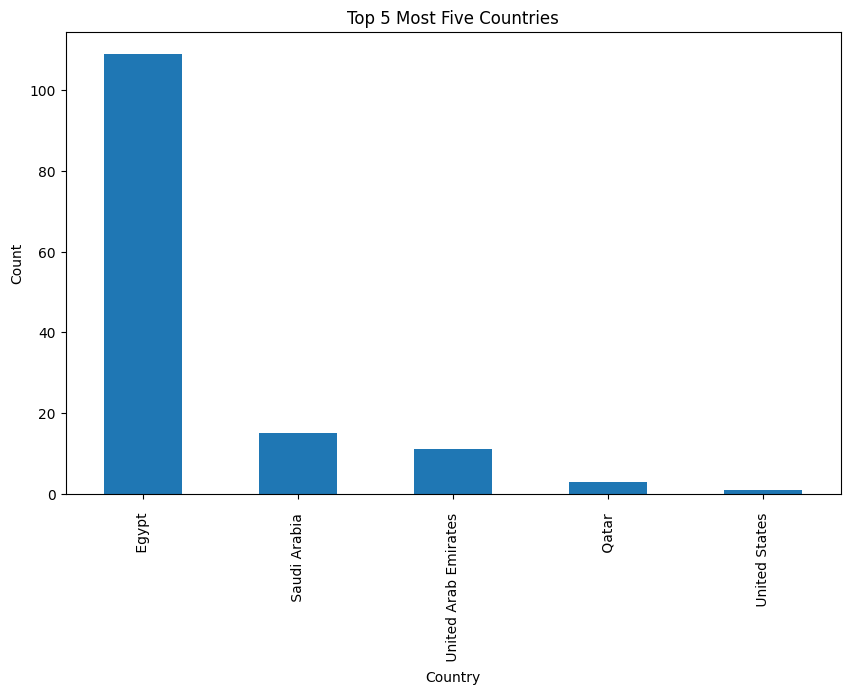

In [17]:
#Top Countries Need python jobs
print(df['Counrty'].value_counts().head(10))
plt.figure(figsize=(10, 6))
df['Counrty'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Most Five Countries')
plt.show()

Company Name
Confidential              20
RDI                        5
BBIConsultancy             3
Kreativstorm               3
Afaqy                      2
Health Insights Group      2
MTSIT                      2
Efada Technology           2
willys kitchenEgypt        2
Bright Creations           2
Name: count, dtype: int64


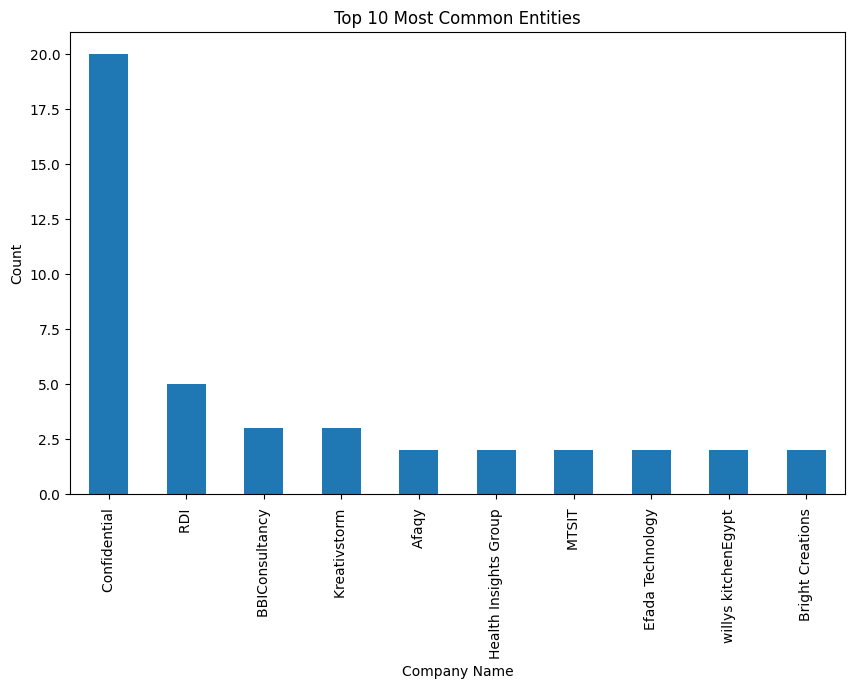

In [18]:
#Top Companies Need python jobs
print(df['Company Name'].value_counts().head(10))
plt.figure(figsize=(10, 6))
df['Company Name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.title('Top 10 Most Common Entities')
plt.show()

Job Title
Odoo Developer                                 9
Data Analyst                                   5
System Administrator                           4
Data Scientist                                 3
Software Engineer                              3
Senior Odoo Developer                          3
Part Time/Full Time Remote Data Entry Clerk    2
Data Engineer                                  2
Full Stack Developer                           2
Machine Learning Engineer                      2
Name: count, dtype: int64


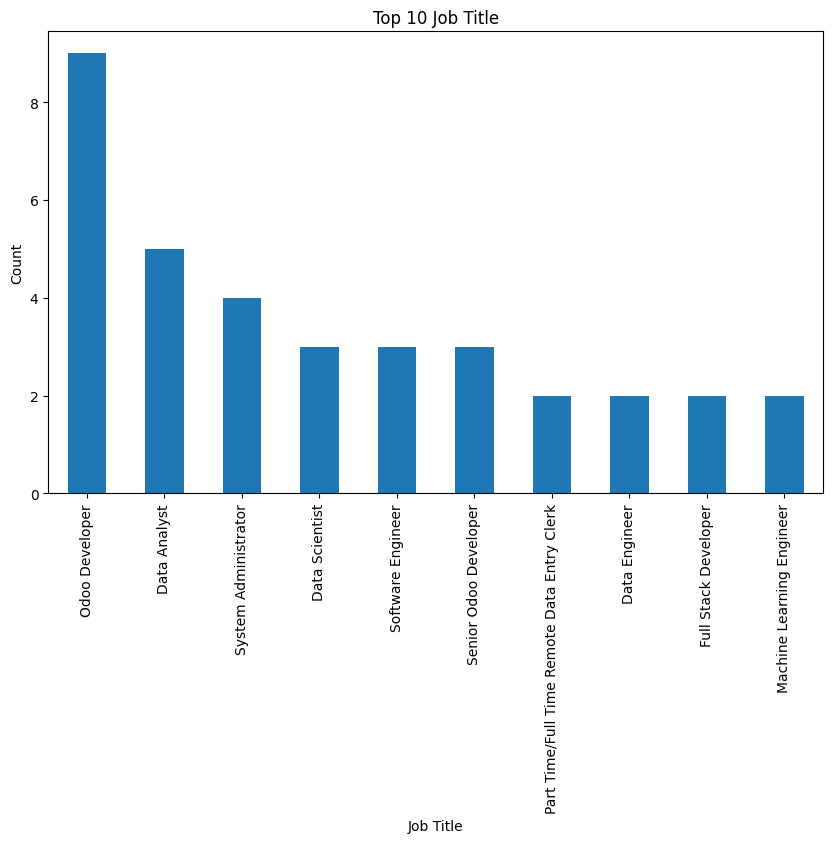

In [19]:
#Top Companies Need python jobs
print(df['Job Title'].value_counts().head(10))
plt.figure(figsize=(10, 6))
df['Job Title'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Title')
plt.show()

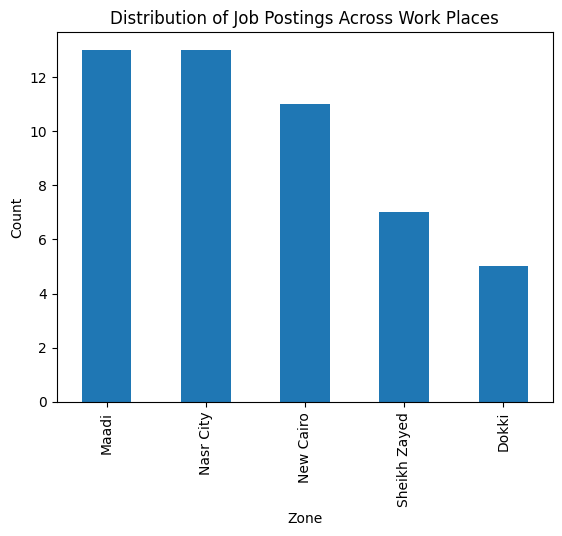

In [20]:
#Distribution of Work places
zone_counts = df['Zone'].value_counts()
top_zones = zone_counts.iloc[1:6]  #To Skip NA
top_zones.plot(kind='bar')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Distribution of Job Postings Across Work Places')
plt.xticks(rotation=90)
plt.show()